# MakeOverMonday
## 2020/W25
### https://data.world/makeovermonday/2020w25-amazons-tiny-profits-explained

In [11]:
import matplotlib.pyplot as plt

In [40]:
import pandas as pd
df = pd.read_excel('https://query.data.world/s/boarssbicaohnlgdpcsc23ljpp6k4m')

In [41]:
df.head()

,Quarter,Revenue (US $M),Net Income (US $M)
0,2020-03-31,"$75,452","$2,535"
1,2019-12-31,"$87,437","$3,268"
2,2019-09-30,"$69,981","$2,134"
3,2019-06-30,"$63,404","$2,625"
4,2019-03-31,"$59,700","$3,561"


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Quarter             61 non-null     datetime64[ns]
 1   Revenue (US $M)     61 non-null     object        
 2   Net Income (US $M)  61 non-null     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.6+ KB


In [43]:
df.shape

(61, 3)

In [44]:
df['revenue'] = df['Revenue (US $M)'].apply(lambda x: float(x.replace('$','').replace(',','')))
df['net_income'] = df['Net Income (US $M)'].apply(lambda x: float(x.replace('$','').replace(',','')))

In [49]:
df['net_income_rate'] = 100 * (df['net_income'] / df['revenue'])
df['revenue_rate'] = 100 - df['net_income_rate']

In [50]:
df

,Quarter,Revenue (US $M),Net Income (US $M),revenue,net_income,net_income_rate,revenue_rate
0,2020-03-31,"$75,452","$2,535",75452.0,2535.0,3.359752,96.640248
1,2019-12-31,"$87,437","$3,268",87437.0,3268.0,3.737548,96.262452
2,2019-09-30,"$69,981","$2,134",69981.0,2134.0,3.049399,96.950601
3,2019-06-30,"$63,404","$2,625",63404.0,2625.0,4.140117,95.859883
4,2019-03-31,"$59,700","$3,561",59700.0,3561.0,5.964824,94.035176
...,...,...,...,...,...,...,...
56,2006-03-31,"$2,279",$51,2279.0,51.0,2.237824,97.762176
57,2005-12-31,"$2,977",$199,2977.0,199.0,6.684582,93.315418
58,2005-09-30,"$1,858",$30,1858.0,30.0,1.614639,98.385361
59,2005-06-30,"$1,753",$52,1753.0,52.0,2.966343,97.033657


<BarContainer object of 61 artists>

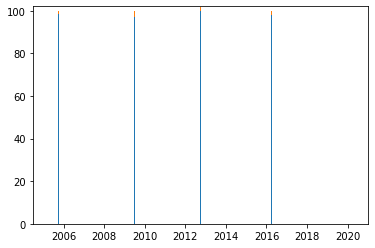

In [61]:

plt.bar(df['Quarter'], df['revenue_rate'])
plt.bar(df['Quarter'], df['net_income_rate'], bottom=df['revenue_rate'])
# plt.show()


<BarContainer object of 1 artists>

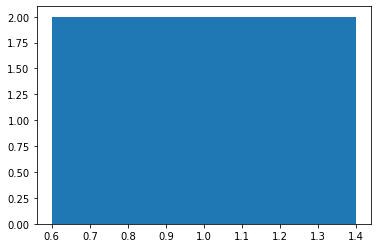

In [56]:
plt.bar([1], [2])